In [ ]:
#1. Data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



file_dataset= pd.read_csv('/content/diabetes.csv')



X = file_dataset.drop(columns='Outcome')
y = file_dataset['Outcome']


data_scaled= StandardScaler()
X_datascaled = data_scaled.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datascaled, y, test_size=0.2, random_state=42)




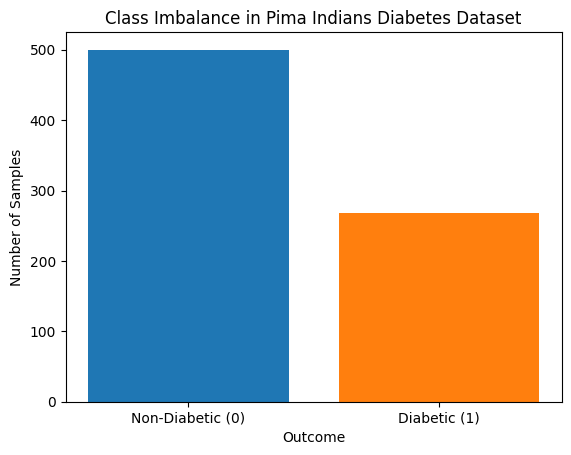

In [ ]:
#Showing Class imbalance
import matplotlib.pyplot as plt


classes = ['Non-Diabetic (0)', 'Diabetic (1)']
values = [500, 268]


plt.bar(classes, values, color=['#1f77b4', '#ff7f0e'])
plt.title('Class Imbalance in Pima Indians Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
#Detecting outliers with ECODB as discussed in the paper. https://ieeexplore.ieee.org/abstract/document/8324209

import numpy as np


import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome')
y = file_dataset['Outcome']


def ecodb(X, y, k=5, threshold=1.5):
    u = np.unique(y)
    a = np.zeros(len(X))


    for cls in u:
        c = (y == cls)
        X_class = X[c]


        t = pairwise_distances(X_class, X_class, metric='euclidean')
        avg = np.mean(t, axis=1)


        for i, v in enumerate(avg):

            if v > np.percentile(avg, 75) + threshold * np.std(avg):
                a[np.where(c)[0][i]] = 1

    return a


a = ecodb(X.values, y.values)


q = np.where(a == 1)[0]
print("Total Outliers:", len(q))
print("Data points of the Outliers:\n", file_dataset.iloc[q])


Total Outliers: 42
Data points of the Outliers:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
54             7      150             66             42      342  34.7   
73             4      129             86             20      270  35.1   
111            8      155             62             26      495  34.0   
139            5      105             72             29      325  36.9   
144            4      154             62             31      284  32.8   
153            1      153             82             42      485  40.6   
162            0      114             80             34      285  44.2   
186            8      181             68             36      495  30.1   
220            0      177             60             29      478  34.6   
228            4      197             70             39      74

In [ ]:



a_train = ecodb(X_train, y_train)
outliers = a_train == 1

X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


from sklearn.linear_model import Perceptron
perceptron = Perceptron()

perceptron.fit(X_train_cleaned, y_train_cleaned)

Perceptron()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome').values
y = file_dataset['Outcome'].values


data_scaler = StandardScaler()
X_datascaled = data_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datascaled, y, test_size=0.2, random_state=42)


a_train = ecodb(X_train, y_train)
outliers = a_train == 1


X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


class Perceptron:
    def __init__(self, learningrate=0.001, epochs=100):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(z)


                update = self.learningrate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(z)
        return y_predicted


customized = Perceptron(learningrate=0.001, epochs=100)


customized.fit(X_train_cleaned, y_train_cleaned)


y_train_pred = customized.predict(X_train_cleaned)
train_acc = accuracy_score(y_train_cleaned, y_train_pred)


y_test_pred = customized.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")




Training Accuracy: 73.75%
Test Accuracy: 76.62%


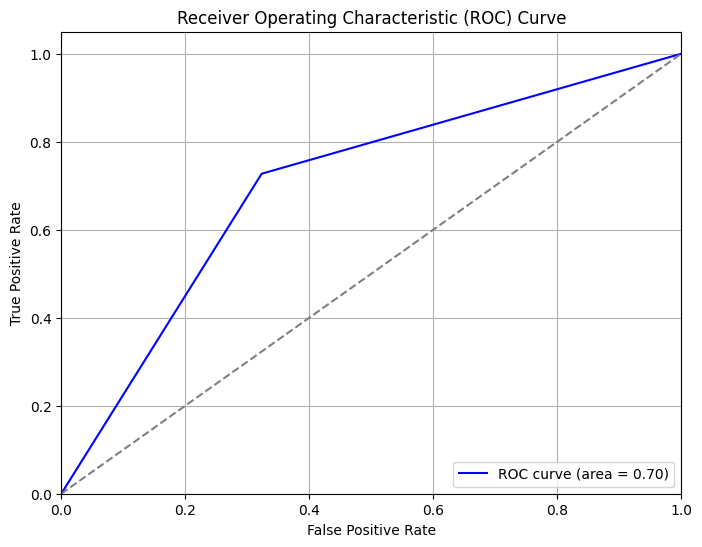

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_scores = perceptron.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

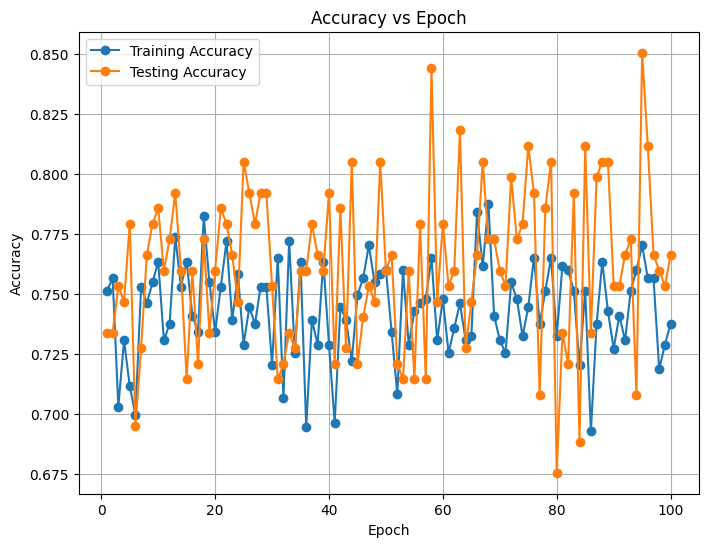

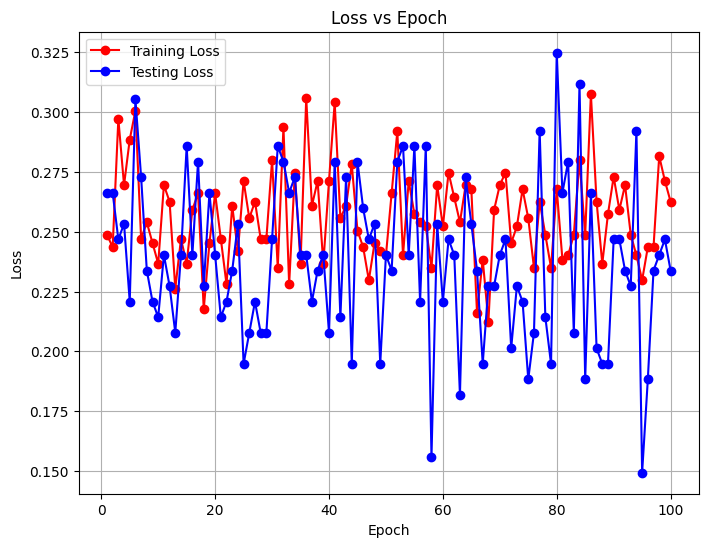

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.accuracies = []
        self.losses = []
        self.val_accuracies = []
        self.val_losses = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):

            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train_epoch = self.predict(X_train)
            accuracy_train = accuracy_score(y_train, y_pred_train_epoch)
            loss_train = np.mean((y_train - y_pred_train_epoch) ** 2)

            self.accuracies.append(accuracy_train)
            self.losses.append(loss_train)


            y_pred_val_epoch = self.predict(X_val)
            accuracy_val = accuracy_score(y_val, y_pred_val_epoch)
            loss_val = np.mean((y_val - y_pred_val_epoch) ** 2)

            self.val_accuracies.append(accuracy_val)
            self.val_losses.append(loss_val)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.001, epochs=100)




perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(8 , 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, perceptron.epochs + 1), perceptron.val_accuracies, label='Testing Accuracy', marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses, label='Training Loss', color='red', marker='o')
plt.plot(range(1, perceptron.epochs + 1), perceptron.val_losses, label='Testing Loss', color='blue', marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



Confusion Matrix:
 [[0.82828283 0.17171717]
 [0.50909091 0.49090909]]


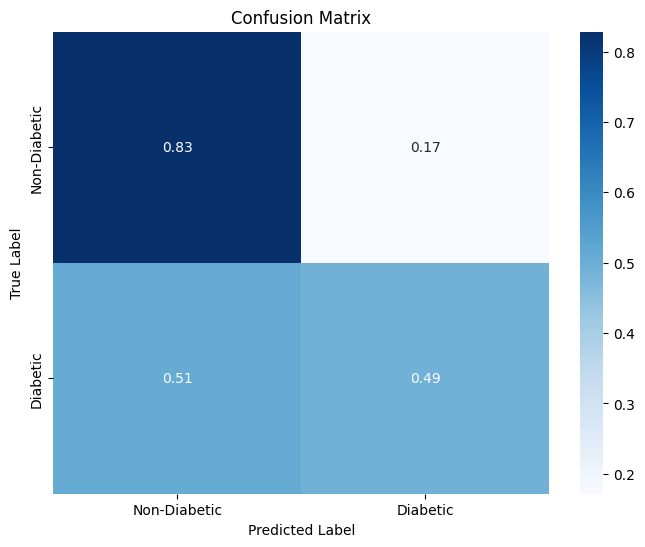


Precision: 0.61
Recall: 0.49
F1-Score: 0.55


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome').values
y = file_dataset['Outcome'].values


dataset_scaled = StandardScaler()
X_datasetscaled = dataset_scaled.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datasetscaled, y, test_size=0.2, random_state=42)


class Perceptron:
    def __init__(self, learningrate=0.001, epochs=100):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.precisionhis = []
        self.recallhis = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        samples, features = X.shape

        self.weights = np.zeros(features)
        self.bias = 0


        for epoch in range(self.epochs):
            for abc, p in enumerate(X):
                o = np.dot(p, self.weights) + self.bias
                y_predicted = self.step(o)


                update = self.learningrate * (y[abc] - y_predicted)
                self.weights += update * p
                self.bias += update


            y_train_pred = self.predict(X)
            precision = precision_score(y, y_train_pred)
            recall = recall_score(y, y_train_pred)
            self.precisionhis.append(precision)
            self.recallhis.append(recall)

    def predict(self, X):
        o = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(o)
        return y_predicted

    def func(self, X):

        return np.dot(X, self.weights) + self.bias


customized = Perceptron(learningrate=0.001, epochs=100)


customized.fit(X_train, y_train)


y_train_pred = customized.predict(X_train)
y_test_pred = customized.predict(X_test)


m = confusion_matrix(y_test, y_test_pred, normalize='true')
print("\nConfusion Matrix:\n", m)


plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='.2f', cmap='Blues', cbar=True, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nPrecision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))



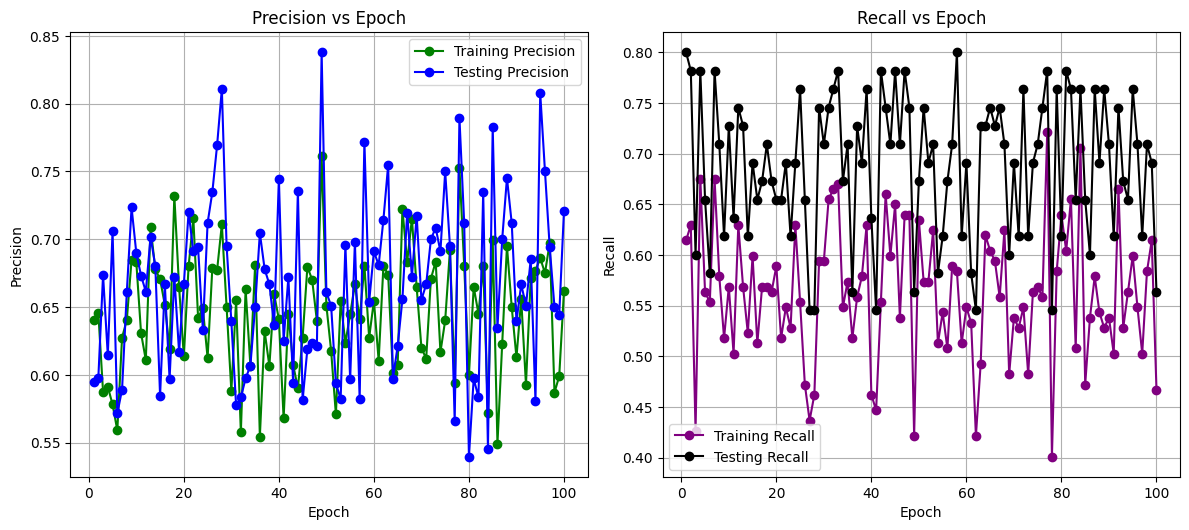

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.accuracies_train = []
        self.losses_train = []
        self.accuracies_test = []
        self.losses_test = []
        self.precision_train = []
        self.recall_train = []
        self.precision_test = []
        self.recall_test = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)


        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train = self.predict(X_train)
            y_pred_test = self.predict(X_test)


            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)
            recall_train = recall_score(y_train, y_pred_train)
            loss_train = np.mean((y_train - y_pred_train) ** 2)


            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            loss_test = np.mean((y_test - y_pred_test) ** 2)


            self.accuracies_train.append(accuracy_train)
            self.precision_train.append(precision_train)
            self.recall_train.append(recall_train)
            self.losses_train.append(loss_train)

            self.accuracies_test.append(accuracy_test)
            self.precision_test.append(precision_test)
            self.recall_test.append(recall_test)
            self.losses_test.append(loss_test)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.001, epochs=100)
perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(12, 10))




plt.subplot(2, 2, 3)
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_train, marker='o', label='Training Precision', color='green')
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_test, marker='o', label='Testing Precision', color='blue')
plt.title('Precision vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_train, marker='o', label='Training Recall', color='purple')
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_test, marker='o', label='Testing Recall', color='black')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#Epoch changed to 200
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome').values
y = file_dataset['Outcome'].values


data_scaler = StandardScaler()
X_datascaled = data_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datascaled, y, test_size=0.2, random_state=42)


a_train = ecodb(X_train, y_train)
outliers = a_train == 1


X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


class Perceptron:
    def __init__(self, learningrate=0.001, epochs=200):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(z)


                update = self.learningrate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(z)
        return y_predicted


customized = Perceptron(learningrate=0.001, epochs=200)


customized.fit(X_train_cleaned, y_train_cleaned)


y_train_pred = customized.predict(X_train_cleaned)
train_acc = accuracy_score(y_train_cleaned, y_train_pred)


y_test_pred = customized.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 70.12%
Test Accuracy: 72.73%


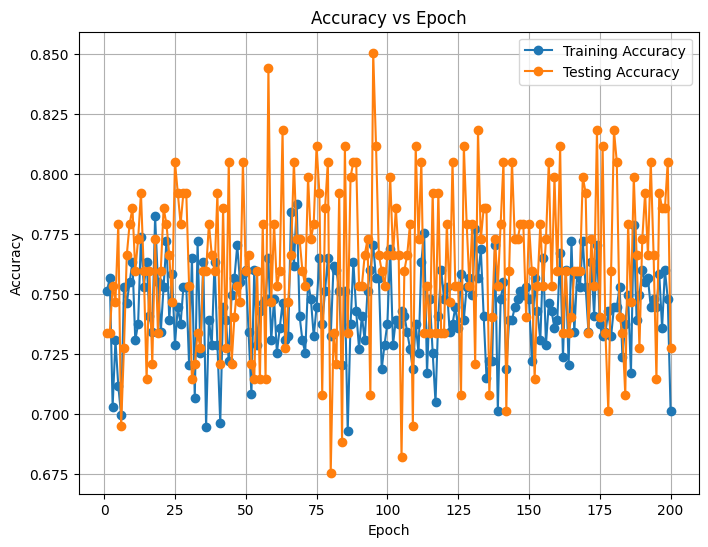

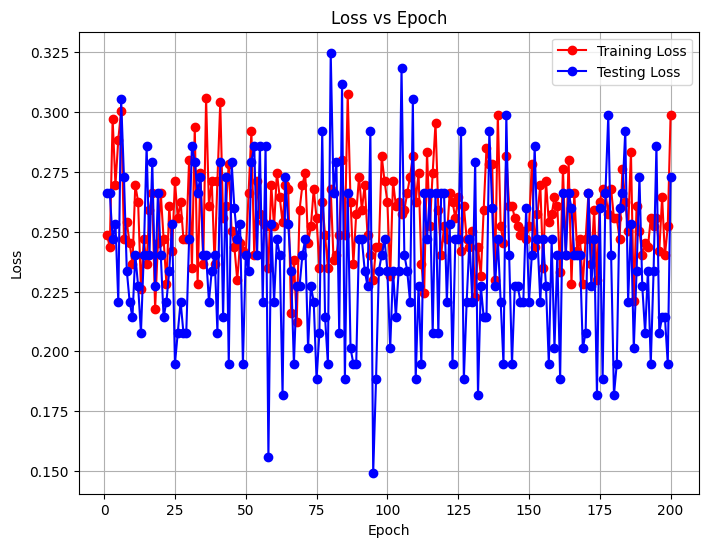

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.001, epochs=200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.accuracies = []
        self.losses = []
        self.val_accuracies = []
        self.val_losses = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):

            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train_epoch = self.predict(X_train)
            accuracy_train = accuracy_score(y_train, y_pred_train_epoch)
            loss_train = np.mean((y_train - y_pred_train_epoch) ** 2)

            self.accuracies.append(accuracy_train)
            self.losses.append(loss_train)


            y_pred_val_epoch = self.predict(X_val)
            accuracy_val = accuracy_score(y_val, y_pred_val_epoch)
            loss_val = np.mean((y_val - y_pred_val_epoch) ** 2)

            self.val_accuracies.append(accuracy_val)
            self.val_losses.append(loss_val)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.001, epochs=200)




perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(8 , 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, perceptron.epochs + 1), perceptron.val_accuracies, label='Testing Accuracy', marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses, label='Training Loss', color='red', marker='o')
plt.plot(range(1, perceptron.epochs + 1), perceptron.val_losses, label='Testing Loss', color='blue', marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



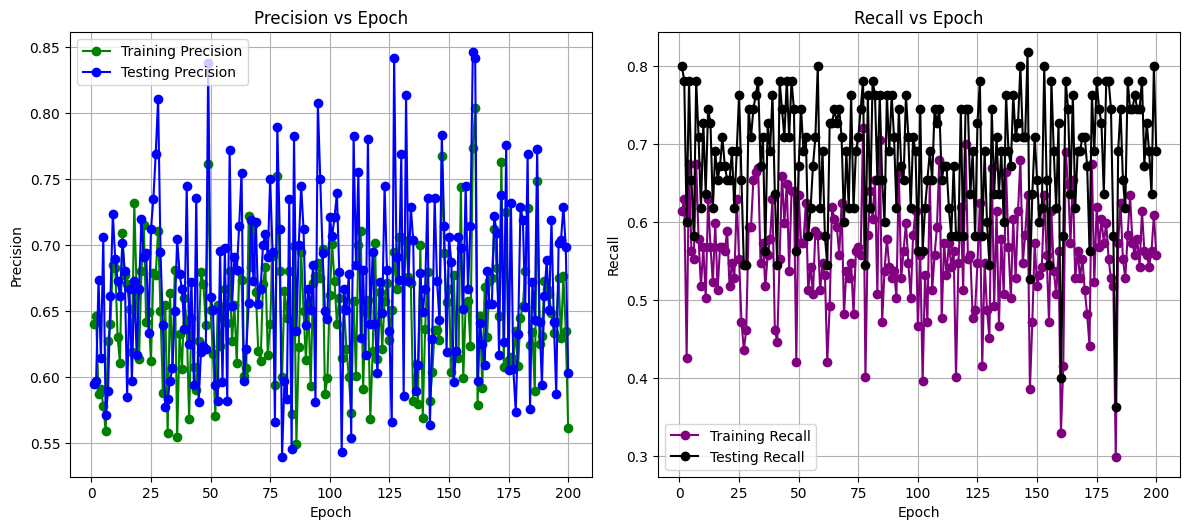

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.001, epochs=200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.accuracies_train = []
        self.losses_train = []
        self.accuracies_test = []
        self.losses_test = []
        self.precision_train = []
        self.recall_train = []
        self.precision_test = []
        self.recall_test = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)


        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train = self.predict(X_train)
            y_pred_test = self.predict(X_test)


            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)
            recall_train = recall_score(y_train, y_pred_train)
            loss_train = np.mean((y_train - y_pred_train) ** 2)


            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            loss_test = np.mean((y_test - y_pred_test) ** 2)


            self.accuracies_train.append(accuracy_train)
            self.precision_train.append(precision_train)
            self.recall_train.append(recall_train)
            self.losses_train.append(loss_train)

            self.accuracies_test.append(accuracy_test)
            self.precision_test.append(precision_test)
            self.recall_test.append(recall_test)
            self.losses_test.append(loss_test)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.001, epochs=200)
perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(12, 10))




plt.subplot(2, 2, 3)
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_train, marker='o', label='Training Precision', color='green')
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_test, marker='o', label='Testing Precision', color='blue')
plt.title('Precision vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_train, marker='o', label='Training Recall', color='purple')
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_test, marker='o', label='Testing Recall', color='black')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#Epoch changed to 50
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome').values
y = file_dataset['Outcome'].values


data_scaler = StandardScaler()
X_datascaled = data_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datascaled, y, test_size=0.2, random_state=42)



a_train = ecodb(X_train, y_train)
outliers = a_train == 1


X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


class Perceptron:
    def __init__(self, learningrate=0.001, epochs=50):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(z)


                update = self.learningrate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(z)
        return y_predicted


customized = Perceptron(learningrate=0.001, epochs=50)


customized.fit(X_train_cleaned, y_train_cleaned)


y_train_pred = customized.predict(X_train_cleaned)
train_acc = accuracy_score(y_train_cleaned, y_train_pred)


y_test_pred = customized.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 75.99%
Test Accuracy: 75.97%


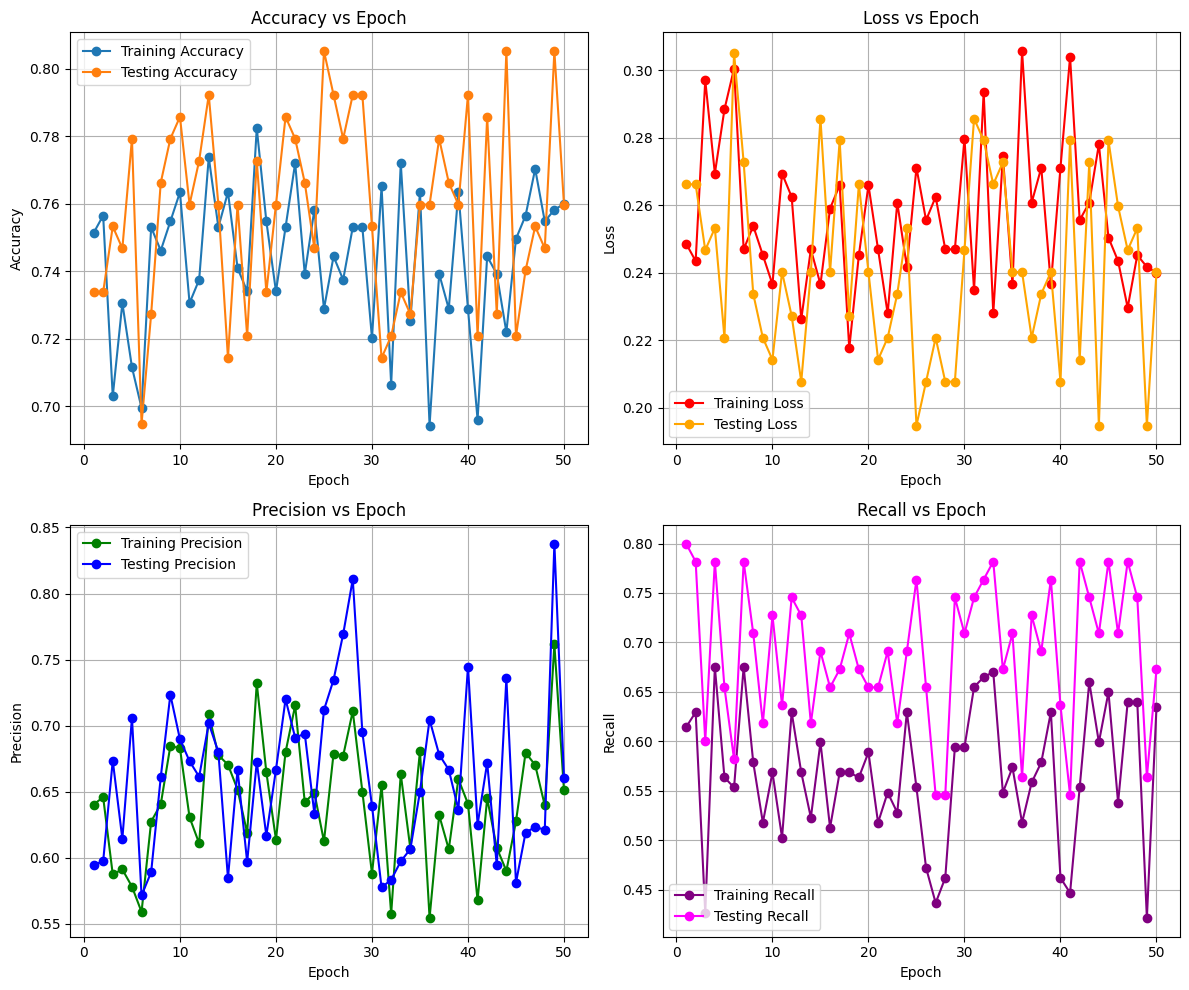

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.001, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.accuracies_train = []
        self.losses_train = []
        self.accuracies_test = []
        self.losses_test = []
        self.precision_train = []
        self.recall_train = []
        self.precision_test = []
        self.recall_test = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)


        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train = self.predict(X_train)
            y_pred_test = self.predict(X_test)


            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)
            recall_train = recall_score(y_train, y_pred_train)
            loss_train = np.mean((y_train - y_pred_train) ** 2)


            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            loss_test = np.mean((y_test - y_pred_test) ** 2)


            self.accuracies_train.append(accuracy_train)
            self.precision_train.append(precision_train)
            self.recall_train.append(recall_train)
            self.losses_train.append(loss_train)

            self.accuracies_test.append(accuracy_test)
            self.precision_test.append(precision_test)
            self.recall_test.append(recall_test)
            self.losses_test.append(loss_test)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.001, epochs=50)
perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)

plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_train, marker='o', label='Training Accuracy')
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_test, marker='o', label='Testing Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_train, marker='o', label='Training Loss', color='red')
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_test, marker='o', label='Testing Loss', color='orange')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_train, marker='o', label='Training Precision', color='green')
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_test, marker='o', label='Testing Precision', color='blue')
plt.title('Precision vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_train, marker='o', label='Training Recall', color='purple')
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_test, marker='o', label='Testing Recall', color='magenta')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
#Learning rate 0.01
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome').values
y = file_dataset['Outcome'].values


data_scaler = StandardScaler()
X_datascaled = data_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datascaled, y, test_size=0.2, random_state=42)


a_train = ecodb(X_train, y_train)
outliers = a_train == 1


X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


class Perceptron:
    def __init__(self, learningrate=0.01, epochs=100):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(z)


                update = self.learningrate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(z)
        return y_predicted


customized = Perceptron(learningrate=0.01, epochs=100)


customized.fit(X_train_cleaned, y_train_cleaned)


y_train_pred = customized.predict(X_train_cleaned)
train_acc = accuracy_score(y_train_cleaned, y_train_pred)


y_test_pred = customized.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 73.75%
Test Accuracy: 76.62%


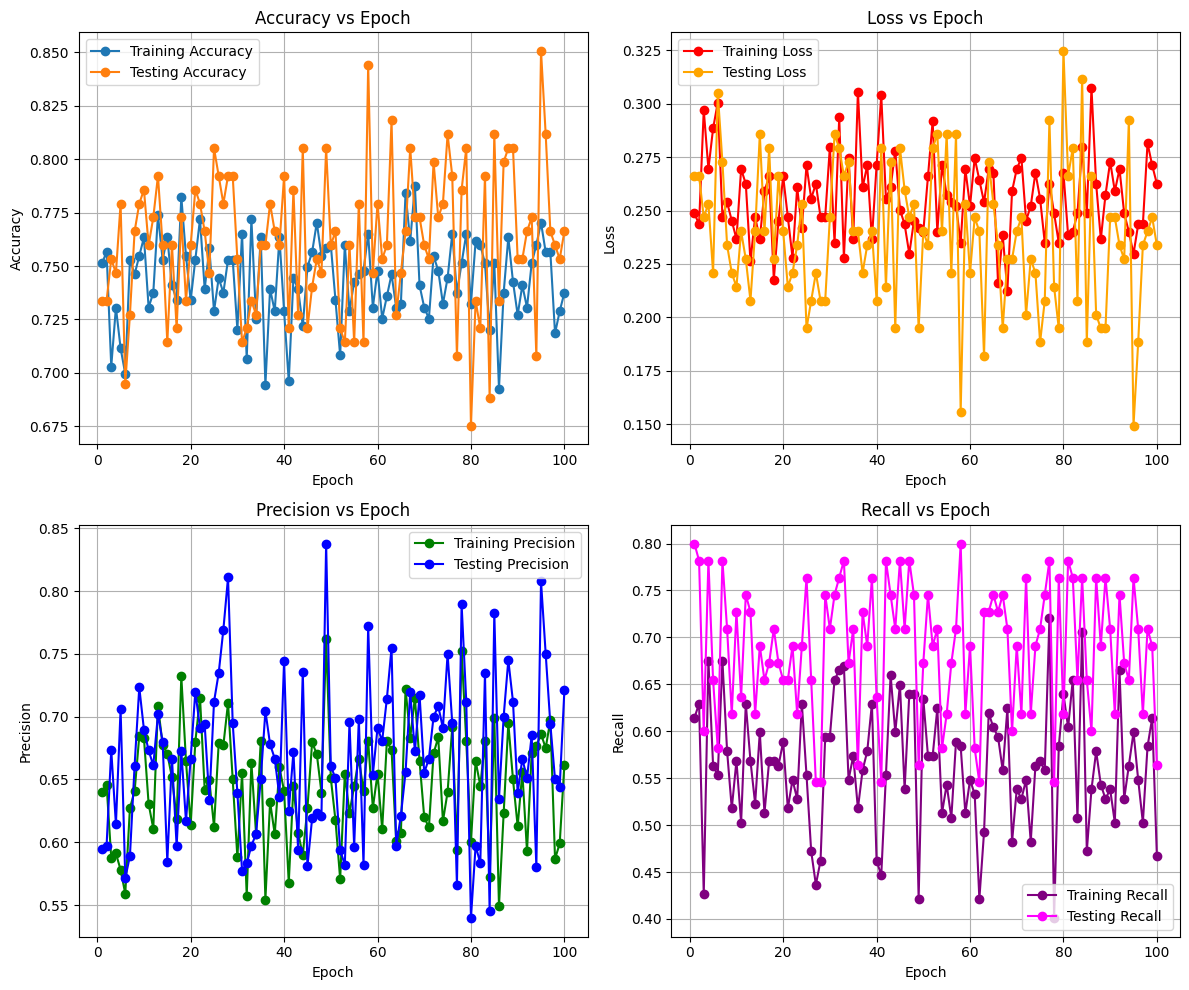

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.accuracies_train = []
        self.losses_train = []
        self.accuracies_test = []
        self.losses_test = []
        self.precision_train = []
        self.recall_train = []
        self.precision_test = []
        self.recall_test = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)


        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train = self.predict(X_train)
            y_pred_test = self.predict(X_test)


            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)
            recall_train = recall_score(y_train, y_pred_train)
            loss_train = np.mean((y_train - y_pred_train) ** 2)


            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            loss_test = np.mean((y_test - y_pred_test) ** 2)


            self.accuracies_train.append(accuracy_train)
            self.precision_train.append(precision_train)
            self.recall_train.append(recall_train)
            self.losses_train.append(loss_train)

            self.accuracies_test.append(accuracy_test)
            self.precision_test.append(precision_test)
            self.recall_test.append(recall_test)
            self.losses_test.append(loss_test)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_train, marker='o', label='Training Accuracy')
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_test, marker='o', label='Testing Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_train, marker='o', label='Training Loss', color='red')
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_test, marker='o', label='Testing Loss', color='orange')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_train, marker='o', label='Training Precision', color='green')
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_test, marker='o', label='Testing Precision', color='blue')
plt.title('Precision vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_train, marker='o', label='Training Recall', color='purple')
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_test, marker='o', label='Testing Recall', color='magenta')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
#Learning rate 1
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns='Outcome').values
y = file_dataset['Outcome'].values


data_scaler = StandardScaler()
X_datascaled = data_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_datascaled, y, test_size=0.2, random_state=42)


a_train = ecodb(X_train, y_train)
outliers = a_train == 1


X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


class Perceptron:
    def __init__(self, learningrate=1, epochs=100):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(z)


                update = self.learningrate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(z)
        return y_predicted


customized = Perceptron(learningrate=1, epochs=100)


customized.fit(X_train_cleaned, y_train_cleaned)


y_train_pred = customized.predict(X_train_cleaned)
train_acc = accuracy_score(y_train_cleaned, y_train_pred)


y_test_pred = customized.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 73.75%
Test Accuracy: 76.62%


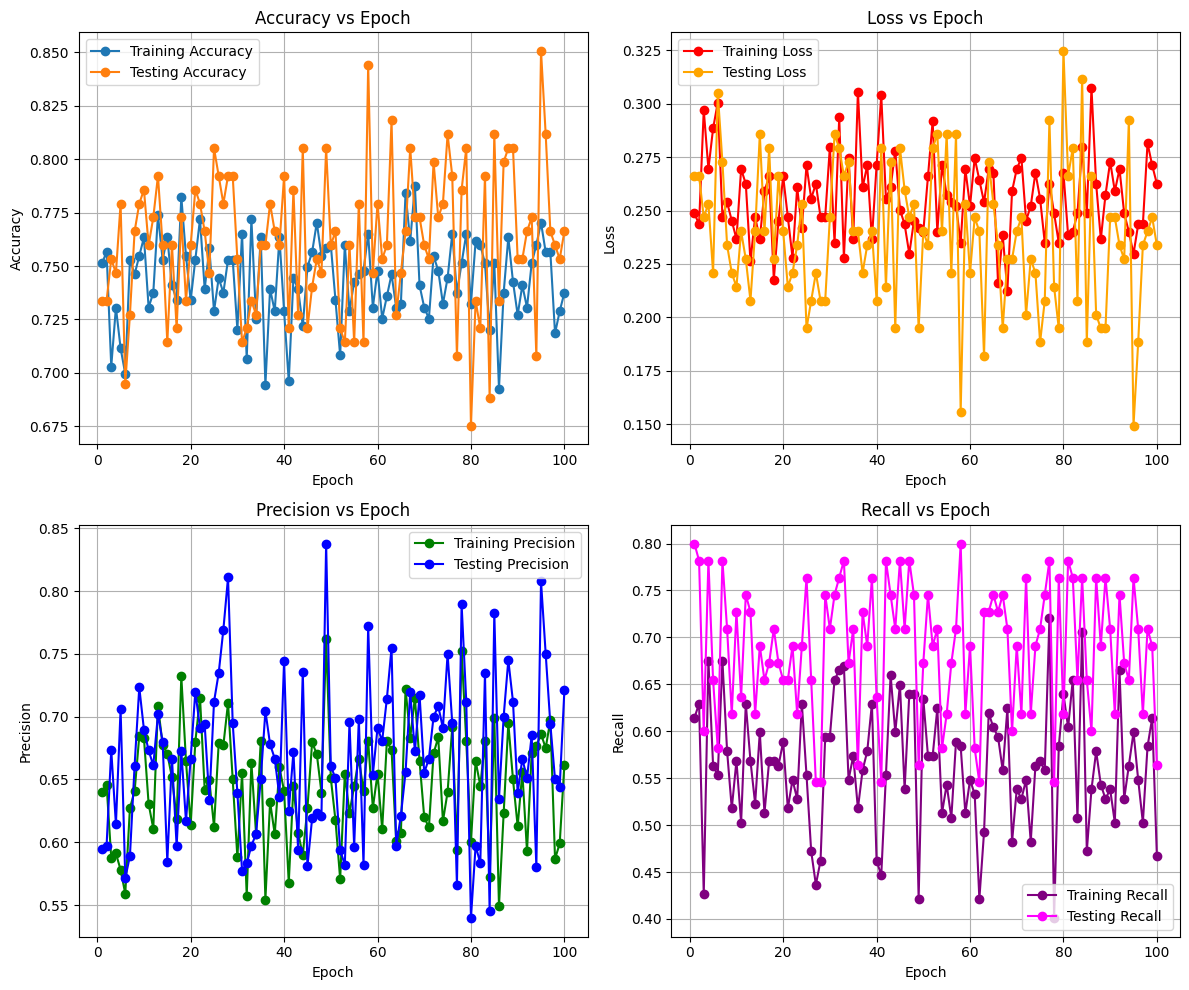

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.accuracies_train = []
        self.losses_train = []
        self.accuracies_test = []
        self.losses_test = []
        self.precision_train = []
        self.recall_train = []
        self.precision_test = []
        self.recall_test = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)


        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_train = self.predict(X_train)
            y_pred_test = self.predict(X_test)


            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)
            recall_train = recall_score(y_train, y_pred_train)
            loss_train = np.mean((y_train - y_pred_train) ** 2)


            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            loss_test = np.mean((y_test - y_pred_test) ** 2)


            self.accuracies_train.append(accuracy_train)
            self.precision_train.append(precision_train)
            self.recall_train.append(recall_train)
            self.losses_train.append(loss_train)

            self.accuracies_test.append(accuracy_test)
            self.precision_test.append(precision_test)
            self.recall_test.append(recall_test)
            self.losses_test.append(loss_test)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=1, epochs=100)
perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_train, marker='o', label='Training Accuracy')
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_test, marker='o', label='Testing Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_train, marker='o', label='Training Loss', color='red')
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_test, marker='o', label='Testing Loss', color='orange')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_train, marker='o', label='Training Precision', color='green')
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_test, marker='o', label='Testing Precision', color='blue')
plt.title('Precision vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_train, marker='o', label='Training Recall', color='purple')
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_test, marker='o', label='Testing Recall', color='magenta')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#With L2 regularization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns=['Outcome']).values
y = file_dataset['Outcome'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



a_train = ecodb(X_train, y_train)
outliers = a_train == 1

X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


class PerceptronWithL2:
    def __init__(self, learningrate=0.001, epochs=100, l2_penalty=0.01):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.l2_penalty = l2_penalty

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                update = self.learningrate * (y[idx] - y_predicted)


                self.weights = self.weights * (1 - self.learningrate * self.l2_penalty) + update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.step(linear_output)
        return y_predicted


perceptron_l2 = PerceptronWithL2(learningrate=0.001, epochs=100, l2_penalty=0.01)


perceptron_l2.fit(X_train_cleaned, y_train_cleaned)


y_train_pred = perceptron_l2.predict(X_train_cleaned)
y_test_pred = perceptron_l2.predict(X_test)


train_acc = accuracy_score(y_train_cleaned, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (after L2 Regularization): {train_acc * 100:.2f}%")
print(f"Test Accuracy (after L2 Regularization): {test_acc * 100:.2f}%")


Training Accuracy (after L2 Regularization): 73.58%
Test Accuracy (after L2 Regularization): 76.62%


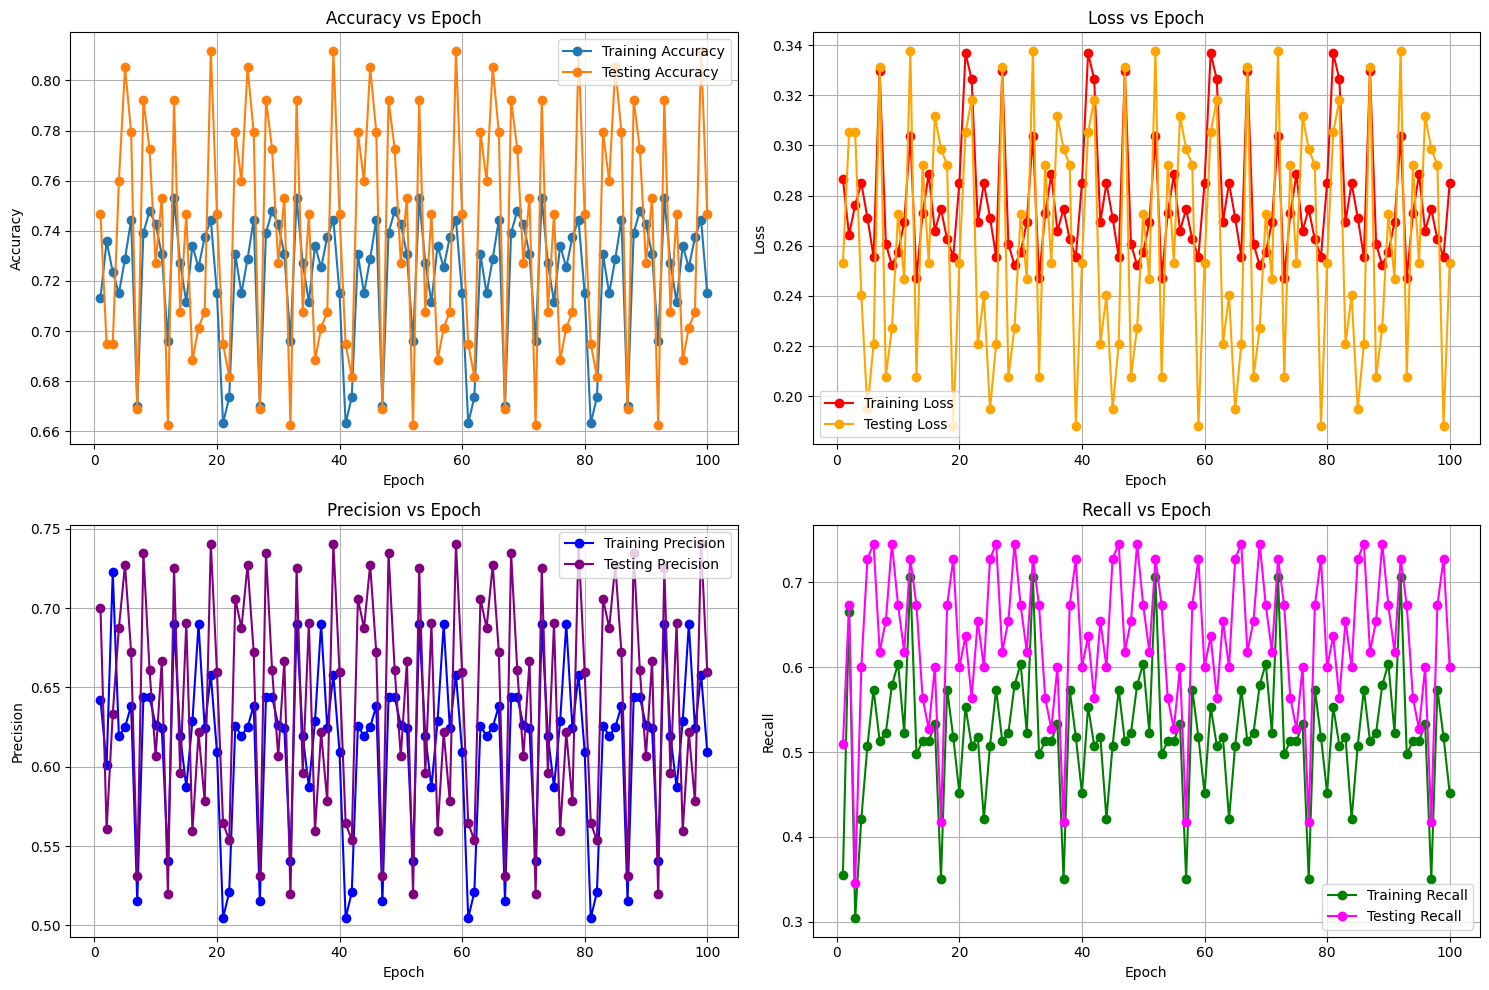

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score


class PerceptronWithL2:
    def __init__(self, learningrate=0.001, epochs=100, l2_penalty=0.01):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.l2_penalty = l2_penalty


        self.accuracies_train = []
        self.losses_train = []
        self.precision_train = []
        self.recall_train = []

        self.accuracies_test = []
        self.losses_test = []
        self.precision_test = []
        self.recall_test = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learningrate * (y_train[idx] - y_predicted)


                self.weights += update * x_i - self.l2_penalty * self.weights
                self.bias += update


            y_pred_train = self.predict(X_train)
            y_pred_test = self.predict(X_test)


            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)
            recall_train = recall_score(y_train, y_pred_train)
            loss_train = np.mean((y_train - y_pred_train) ** 2) + self.l2_penalty * np.sum(self.weights ** 2)


            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            loss_test = np.mean((y_test - y_pred_test) ** 2) + self.l2_penalty * np.sum(self.weights ** 2)


            self.accuracies_train.append(accuracy_train)
            self.precision_train.append(precision_train)
            self.recall_train.append(recall_train)
            self.losses_train.append(loss_train)

            self.accuracies_test.append(accuracy_test)
            self.precision_test.append(precision_test)
            self.recall_test.append(recall_test)
            self.losses_test.append(loss_test)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = PerceptronWithL2(learningrate=0.001, epochs=100, l2_penalty=0.01)
perceptron.fit(X_train_cleaned, y_train_cleaned, X_test, y_test)


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_train, marker='o', label='Training Accuracy')
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies_test, marker='o', label='Testing Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_train, marker='o', label='Training Loss', color='red')
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses_test, marker='o', label='Testing Loss', color='orange')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_train, marker='o', label='Training Precision', color='blue')
plt.plot(range(1, perceptron.epochs + 1), perceptron.precision_test, marker='o', label='Testing Precision', color='purple')
plt.title('Precision vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_train, marker='o', label='Training Recall', color='green')
plt.plot(range(1, perceptron.epochs + 1), perceptron.recall_test, marker='o', label='Testing Recall', color='magenta')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
#PCA

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron



file_dataset = pd.read_csv('/content/diabetes.csv')


X = file_dataset.drop(columns=['Outcome']).values
y = file_dataset['Outcome'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


a_train = ecodb(X_train, y_train)
outliers = a_train == 1


X_train_cleaned = X_train[~outliers]
y_train_cleaned = y_train[~outliers]


pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_cleaned)
X_test_pca = pca.transform(X_test)


class CustomPerceptron:
    def __init__(self, learningrate=0.0001, epochs=7000):
        self.learningrate = learningrate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                update = self.learningrate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


customized_perceptron = CustomPerceptron(learningrate=0.0001, epochs=7000)
customized_perceptron.fit(X_train_pca, y_train_cleaned)


y_train_pred = customized_perceptron.predict(X_train_pca)
y_test_pred = customized_perceptron.predict(X_test_pca)


train_accuracy = accuracy_score(y_train_cleaned, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Training Accuracy: 70.12%
Test Accuracy: 69.48%


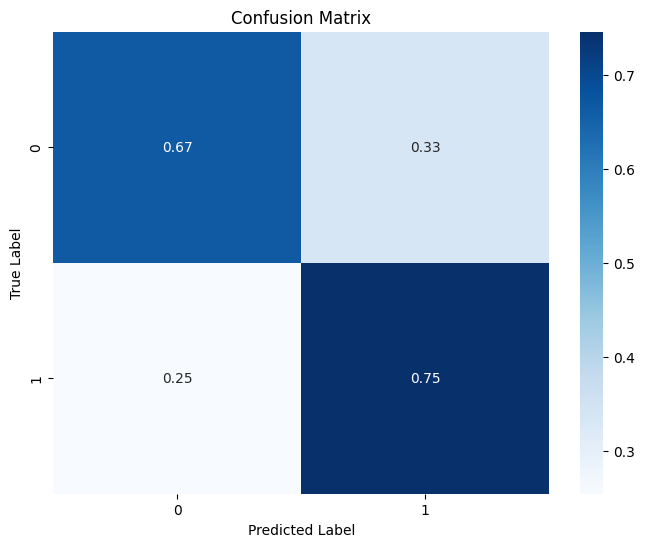

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        99
           1       0.55      0.75      0.64        55

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.69      0.70       154



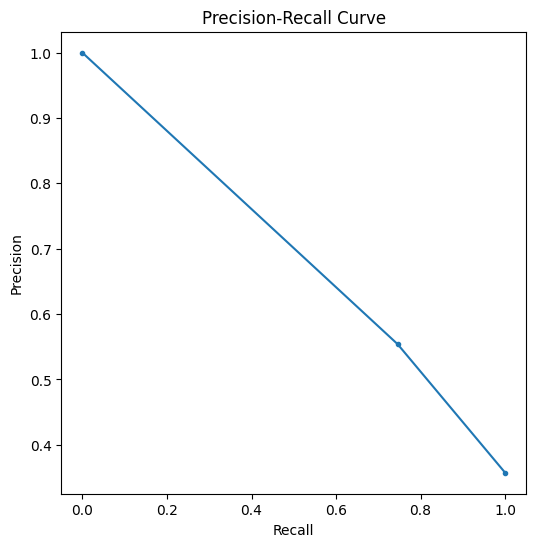

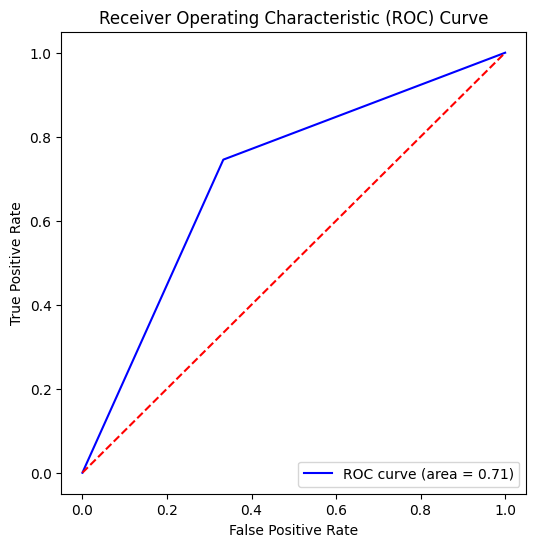

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc




conf_matrix = confusion_matrix(y_test, y_test_pred)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


print("Classification Report:\n", classification_report(y_test, y_test_pred))


precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

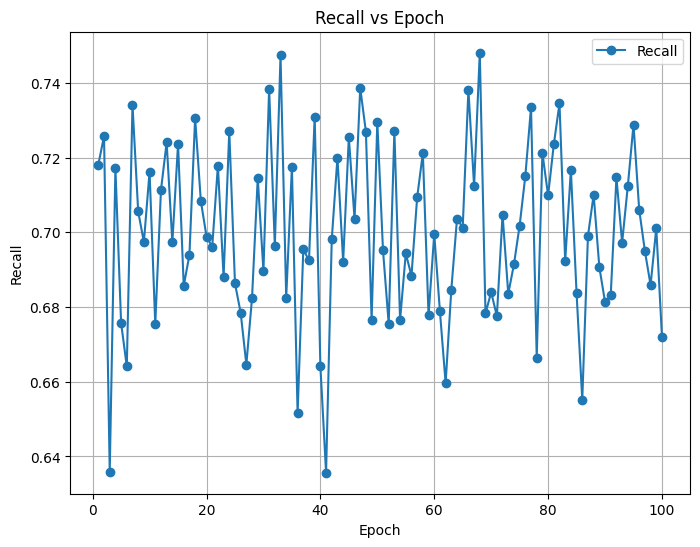

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.0001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        self.recalls = []

        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_epoch = self.predict(X)
            recall = recall_score(y, y_pred_epoch, average='macro')
            self.recalls.append(recall)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = Perceptron(learning_rate=0.0001, epochs=100)
perceptron.fit(X_train_cleaned, y_train_cleaned)


plt.figure(figsize=(8, 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.recalls, marker='o', label='Recall')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.grid(True)
plt.legend()
plt.show()


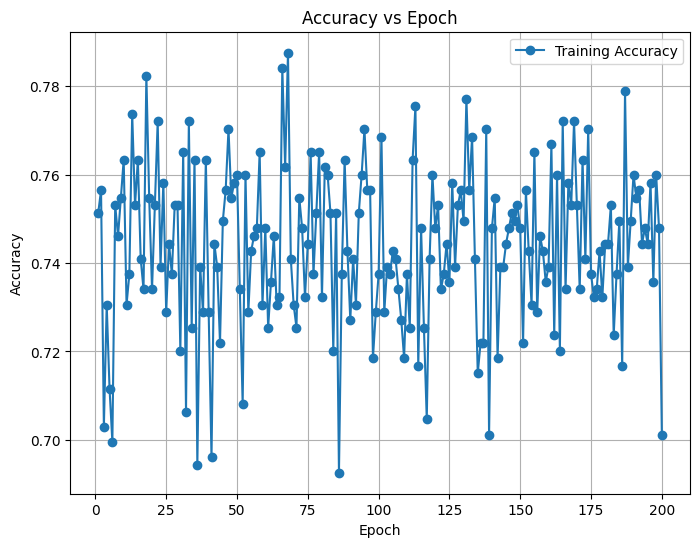

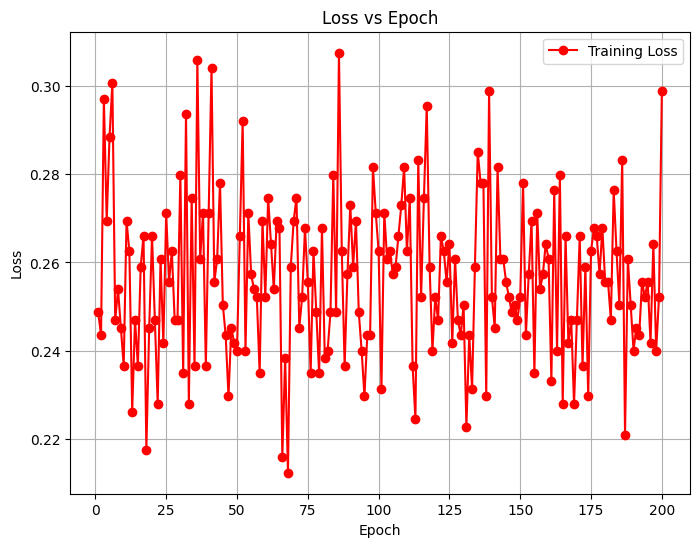

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class CustomPerceptron:
    def __init__(self, learning_rate=0.001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.accuracies = []
        self.losses = []

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)


                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


            y_pred_epoch = self.predict(X)


            accuracy = accuracy_score(y, y_pred_epoch)
            loss = np.mean((y - y_pred_epoch) ** 2)

            self.accuracies.append(accuracy)
            self.losses.append(loss)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)


perceptron = CustomPerceptron(learning_rate=0.001, epochs=200)
perceptron.fit(X_train_cleaned, y_train_cleaned)

plt.figure(figsize=(8, 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies, marker='o', label='Training Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.losses, marker='o', color='red', label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
